# **Sistem Rekomendasi Tempat Wisata di Bandung**

Nama: Agistia Ronna Aniqa

Cohort ID: MC299D5X1601

Menghubungkan Google Drive ke Colab.


In [2]:
# Menghubungkan Google Drive ke Colab untuk akses file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Berpindah ke Direktori Proyek pada Google Drive.

In [3]:
# Memindahkan direktori kerja ke folder proyek di Google Drive
%cd /content/drive/MyDrive/Sistem_Rekomendasi_CodingCamp

/content/drive/MyDrive/Sistem_Rekomendasi_CodingCamp


## **Instal dan Import Library**

Menginstal library **Sastrawi** yang digunakan untuk preprocessing teks bahasa Indonesia, termasuk stopword removal dan stemming.

In [4]:
# Instalasi library Sastrawi yang digunakan untuk proses stemming dan stopword removal pada teks berbahasa Indonesia
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


Mengimpor library untuk analisis data, visualisasi, pemrosesan teks, manipulasi file, dan pembangunan model machine learning.


In [5]:
# Library untuk analisis dan manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Library untuk pemrosesan teks
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.metrics.pairwise import cosine_similarity

# Library untuk manipulasi file dan path
from zipfile import ZipFile
from pathlib import Path

# Library untuk pembangunan model deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

TF-IDF berfungsi mengonversi teks kategori wisata menjadi fitur numerik, sementara stemmer dan stopword remover digunakan untuk melakukan preprocessing teks seperti stemming dan penghapusan kata tidak penting.


In [6]:
# TF-IDF Vectorizer dengan batas maksimal 5000 fitur untuk mengubah teks menjadi representasi numerik
tfidf_vectorizer_model = TfidfVectorizer(max_features=5000)

# Stemmer bahasa Indonesia untuk melakukan proses stemming
stem = StemmerFactory().create_stemmer()

# Stopword remover untuk menghapus kata-kata umum yang tidak memiliki makna penting dalam analisis
stopword = StopWordRemoverFactory().create_stop_word_remover()

Ketiga DataFrame ini menjadi sumber data utama untuk analisis dan pembuatan model rekomendasi.

- `df_rating` memuat data rating atau penilaian dari pengguna terhadap tempat wisata.  
- `df_place` memuat data informasi tempat wisata beserta ID-nya.  
- `df_user` memuat data informasi pengguna yang memberikan rating.  

In [7]:
# Memuat data dari file CSV yang tersimpan di Google Drive ke dalam DataFrame pandas, sehingga data dapat diolah lebih lanjut dalam proyek sistem rekomendasi
df_rating = pd.read_csv('/content/drive/MyDrive/Sistem_Rekomendasi_CodingCamp/dataset/tourism_rating.csv')
df_place = pd.read_csv('/content/drive/MyDrive/Sistem_Rekomendasi_CodingCamp/dataset/tourism_with_id.csv')
df_user = pd.read_csv('/content/drive/MyDrive/Sistem_Rekomendasi_CodingCamp/dataset/user.csv')

## **Eksplorasi Awal Dataset**


Menampilkan ringkasan struktur, jumlah entri, dan tipe data dari dataset `df_rating`.

In [8]:
# Menampilkan informasi data rating
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Menampilkan detail struktur, jumlah baris, dan tipe kolom pada dataset `df_place`.

In [9]:
# Menampilkan informasi data tempat wisata
df_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Menampilkan struktur, jumlah entri, dan tipe data pada dataset `df_user`.

In [10]:
# Menampilkan informasi data user
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


Menampilkan preview awal (5 baris teratas) dari dataset `df_place`.

In [11]:
# Menampilkan 5 baris pertama data tempat wisata
df_place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Menampilkan 5 baris awal dari dataset `df_user` untuk melihat struktur dan isinya.

In [12]:
# Menampilkan 5 baris pertama data user
df_user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


Menampilkan 5 baris awal dari dataset `df_rating` untuk melihat isi data rating dari user ke tempat wisata.

In [13]:
# Menampilkan 5 baris pertama data rating
df_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


## **Pembersihan dan Filter Data**

Menghapus kolom-kolom yang tidak relevan (`Time_Minutes`, `Unnamed: 11`, `Unnamed: 12`) dari dataset `df_place`.

In [14]:
# Menghapus kolom yang tidak diperlukan pada dataset `df_place`
df_place = df_place.drop(['Time_Minutes','Unnamed: 11','Unnamed: 12'], axis=1)

Memilih hanya data tempat wisata yang berlokasi di Bandung dari dataset `df_place`.

In [15]:
# Memilih data tempat wisata khusus di Bandung dari dataset `df_place`
df_place = df_place[df_place['City'] == 'Bandung']

Menampilkan 1 baris pertama dari dataset `df_place` untuk memastikan hasil filter dan pembersihan sudah sesuai.

In [16]:
# Menampilkan 1 baris pertama dari dataset `df_place`
df_place.head(1)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
210,211,GunungTangkuban perahu,Gunung Tangkuban Parahu adalah salah satu gunu...,Cagar Alam,Bandung,30000,4.5,"{'lat': -6.759637700000001, 'lng': 107.6097807}",-6.759638,107.609781


Menggabungkan `df_rating` dengan `df_place` agar hanya menyisakan rating untuk tempat wisata di Bandung berdasarkan `Place_Id`.

In [17]:
# Memilih data rating khusus untuk tempat wisata di Bandung berdasarkan `Place_Id`
df_rating = pd.merge(df_rating, df_place[['Place_Id']], how='right', on='Place_Id')

Menampilkan satu baris pertama dari `df_rating` untuk memastikan data rating hanya untuk tempat wisata di Bandung.

In [18]:
# Menampilkan 1 baris pertama dari dataset `df_rating`
df_rating.head(1)

,User_Id,Place_Id,Place_Ratings
0,9,211,3


Memilih user yang memberi rating di Bandung, menghapus duplikat, lalu mengurutkan berdasarkan `User_Id`.

In [19]:
# Memilih pengguna yang memberikan rating di Bandung berdasarkan `User_Id`, serta membersihkan dan mengurutkan data
df_user = pd.merge(df_user, df_rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')

Menampilkan 1 baris pertama dari `df_user` setelah difilter untuk pengguna yang memberikan rating di Bandung.

In [20]:
# Menampilkan 1 baris pertama dari dataset `df_user`
df_user.head(1)

,User_Id,Location,Age
260,1,"Semarang, Jawa Tengah",20


## **Visualisasi Data**

### **Tempat Wisata dengan Rating Terbanyak**


Menampilkan 10 tempat wisata terpopuler berdasarkan jumlah rating yang diberikan oleh pengguna.

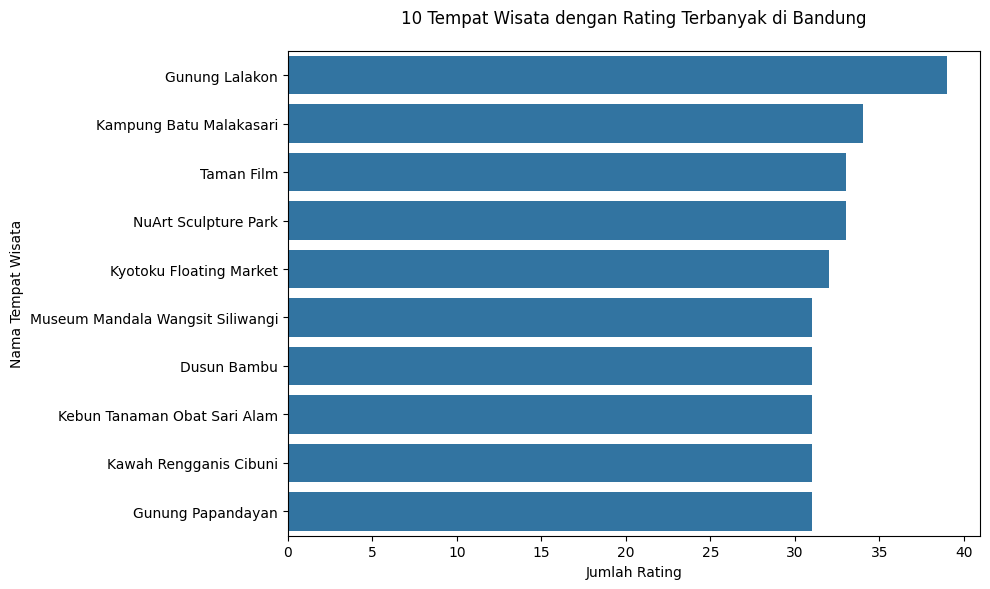

In [21]:
# Membuat DataFrame `top_10` yang berisi 10 tempat wisata di Bandung dengan jumlah rating terbanyak
top_10 = df_rating['Place_Id'].value_counts().reset_index(name='rating_count').rename(columns={'index': 'Place_Id'})[0:10]

# Menggabungkan data tersebut dengan nama tempat wisata
top_10 = pd.merge(top_10, df_place[['Place_Id','Place_Name']], how='left', on='Place_Id')

# Membuat visualisasi menggunakan bar plot untuk menampilkan 10 tempat wisata dengan rating terbanyak
plt.figure(figsize=(10,6))
sns.barplot(x='rating_count', y='Place_Name', data=top_10)
plt.title('10 Tempat Wisata dengan Rating Terbanyak di Bandung', pad=20)
plt.xlabel('Jumlah Rating')
plt.ylabel('Nama Tempat Wisata')
plt.tight_layout()
plt.show()

### **Perbandingan Kategori Tempat Wisata**

Menampilkan distribusi kategori tempat wisata, seperti kuliner, alam, hiburan, dan lainnya.

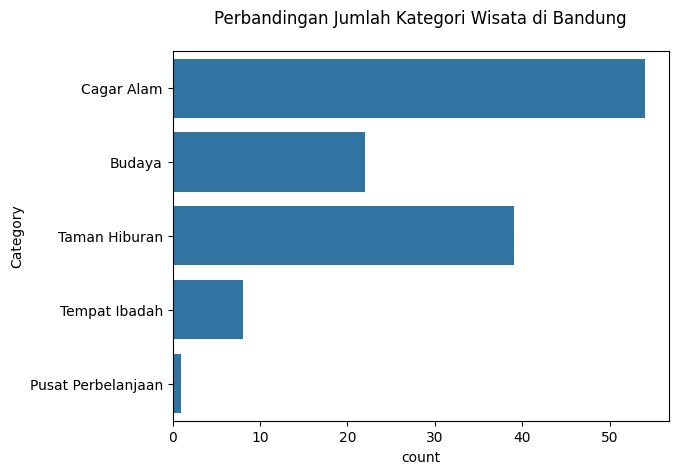

In [22]:
# Memvisualisasikan distribusi jumlah tempat wisata berdasarkan kategori di Bandung
sns.countplot(y='Category', data=df_place)
plt.title('Perbandingan Jumlah Kategori Wisata di Bandung', pad=20)
plt.show()

### **Distribusi Usia Pengguna**

Menganalisis data demografi pengguna, mencakup distribusi usia dan kota asal.

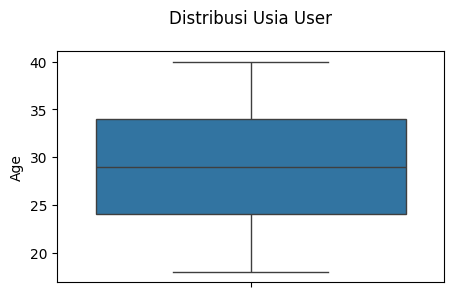

In [23]:
# Memvisualisasikan distribusi usia pengguna menggunakan boxplot
plt.figure(figsize=(5,3))
sns.boxplot(df_user['Age'])
plt.title('Distribusi Usia User', pad=20)
plt.show()

### **Asal Kota User**

Informasi ini dapat dimanfaatkan untuk mempersonalisasi rekomendasi sesuai asal kota maupun rentang usia pengguna.

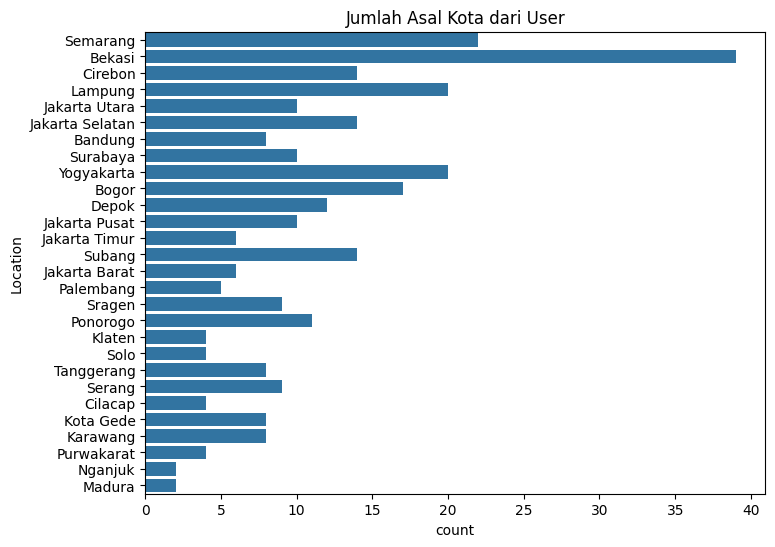

In [24]:
# Memvisualisasikan jumlah pengguna berdasarkan kota asal mereka
asal_kota = df_user['Location'].apply(lambda x: x.split(',')[0])

plt.figure(figsize=(8,6))
sns.countplot(y=asal_kota)
plt.title('Jumlah Asal Kota dari User')
plt.show()

### **Informasi Umum Tempat Wisata**

Menampilkan jumlah tempat wisata unik dan kategori wisata yang tersedia di dataset `df_place`.

In [25]:
# Menampilkan informasi ringkasan tentang tempat wisata di Bandung
print(f"Terdapat {df_place['Place_Name'].nunique()} Tempat Wisata di Bandung")
print(f"Terdiri dari {df_place['Category'].nunique()} Kategori Wisata yaitu")
print('Kategori Wisata  :', df_place['Category'].unique())

Terdapat 124 Tempat Wisata di Bandung
Terdiri dari 5 Kategori Wisata yaitu
Kategori Wisata  : ['Cagar Alam' 'Budaya' 'Taman Hiburan' 'Tempat Ibadah'
 'Pusat Perbelanjaan']


### **Pie Chart Kategori Tempat Wisata**

Memvisualisasikan proporsi kategori tempat wisata menggunakan pie chart dan menampilkan jumlah tempat wisata untuk setiap kategori secara rinci.

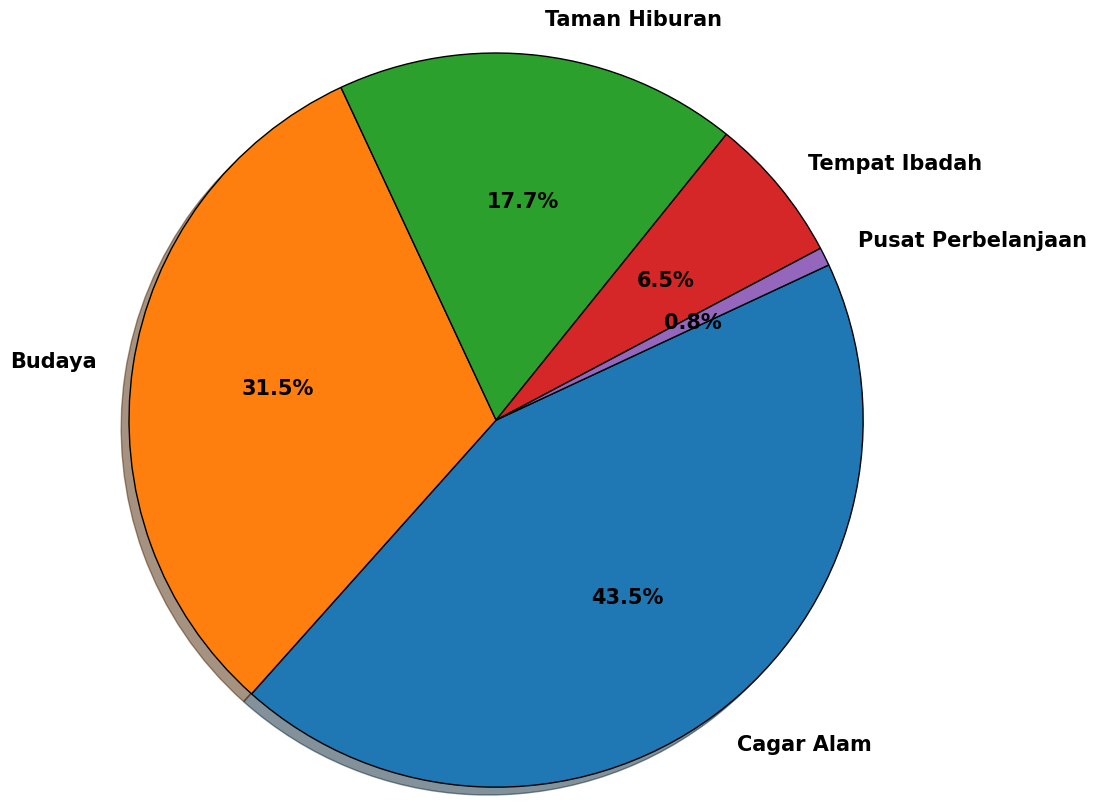

Jumlah Tempat Wisata dengan Kategori Cagar Alam : 54
Jumlah Tempat Wisata dengan Kategori Taman Hiburan : 39
Jumlah Tempat Wisata dengan Kategori Budaya : 22
Jumlah Tempat Wisata dengan Kategori Tempat Ibadah : 8
Jumlah Tempat Wisata dengan Kategori Pusat Perbelanjaan : 1


In [26]:
# Memvisualisasikan dan menampilkan jumlah tempat wisata berdasarkan kategori di Bandung
columns_category_type = df_place['Category'].unique().tolist()
plt.rcParams["figure.figsize"] = (15,8)
plt.pie(df_place['Category'].value_counts(), autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, counterclock=False, shadow=True, startangle=25,
        radius=1.3, labels=columns_category_type, textprops={'fontsize': 15, 'weight': 'bold'})
plt.tight_layout()
plt.show()

for label, count in df_place['Category'].value_counts().items():
    print("Jumlah Tempat Wisata dengan Kategori", label, ":", count)

### **Jumlah User Berdasarkan Kota**

Menampilkan jumlah pengguna yang berasal dari masing-masing kota dengan mencetak nama kota dan total penggunanya.

In [27]:
# Menampilkan jumlah pengguna berdasarkan kota asal mereka
for label, count in df_user['Location'].value_counts().items():
    print("Jumlah User dari Kota", label, ":", count)

Jumlah User dari Kota Bekasi, Jawa Barat : 39
Jumlah User dari Kota Semarang, Jawa Tengah : 22
Jumlah User dari Kota Lampung, Sumatera Selatan : 20
Jumlah User dari Kota Yogyakarta, DIY : 20
Jumlah User dari Kota Bogor, Jawa Barat : 17
Jumlah User dari Kota Cirebon, Jawa Barat : 14
Jumlah User dari Kota Jakarta Selatan, DKI Jakarta : 14
Jumlah User dari Kota Subang, Jawa Barat : 14
Jumlah User dari Kota Depok, Jawa Barat : 12
Jumlah User dari Kota Ponorogo, Jawa Timur : 11
Jumlah User dari Kota Jakarta Utara, DKI Jakarta : 10
Jumlah User dari Kota Surabaya, Jawa Timur : 10
Jumlah User dari Kota Jakarta Pusat, DKI Jakarta : 10
Jumlah User dari Kota Sragen, Jawa Tengah : 9
Jumlah User dari Kota Serang, Banten : 9
Jumlah User dari Kota Bandung, Jawa Barat : 8
Jumlah User dari Kota Karawang, Jawa Barat : 8
Jumlah User dari Kota Kota Gede, DIY : 8
Jumlah User dari Kota Tanggerang, Banten : 8
Jumlah User dari Kota Jakarta Timur, DKI Jakarta : 6
Jumlah User dari Kota Jakarta Barat, DKI Jakart

## **Model Content Based Filtering**

Membuat representasi fitur kategori tempat wisata menggunakan TF-IDF (Term Frequency-Inverse Document Frequency), yang mengubah kategori menjadi vektor angka untuk analisis kemiripan.


In [28]:
# Membuat model Content-Based Filtering berbasis kategori tempat wisata dengan menggunakan TF-IDF
tfidf_vectorizer_for_category = TfidfVectorizer()
tfidf_vectorizer_for_category.fit(df_place['Category'])
tfidf_vectorizer_for_category.get_feature_names_out()

array(['alam', 'budaya', 'cagar', 'hiburan', 'ibadah', 'perbelanjaan',
       'pusat', 'taman', 'tempat'], dtype=object)

Mengubah data kategori tempat wisata menjadi matriks numerik menggunakan TF-IDF, lalu menampilkan dimensi matriks (jumlah tempat wisata × jumlah fitur kategori).

In [29]:
# Mengubah data kategori tempat wisata menjadi representasi numerik menggunakan TF-IDF dan mengecek dimensinya
tfidf_matrix = tfidf_vectorizer_for_category.fit_transform(df_place['Category'])
tfidf_matrix.shape

(124, 9)

Mengubah matriks TF-IDF yang berupa format sparse menjadi matriks penuh (dense matrix) agar nilai-nilai TF-IDF dapat dilihat secara lengkap dan eksplisit.

In [30]:
# Mengonversi matriks TF-IDF menjadi matriks penuh untuk melihat semua nilainya secara eksplisit
tfidf_matrix.todense()

matrix([[0.70710678, 0.        , 0.70710678, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.70710678, 0.        , 0.70710678, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ]])

Membuat DataFrame dari matriks TF-IDF kategori dengan nama tempat sebagai indeks dan kata-kata kategori sebagai kolom, lalu menampilkan 10 baris acak untuk melihat contoh representasi fitur tiap tempat wisata.

In [31]:
# Menampilkan 10 baris acak dari DataFrame yang berisi nilai TF-IDF kategori untuk setiap tempat wisata
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf_vectorizer_for_category.get_feature_names_out(),
    index=df_place.Place_Name
).sample(10, axis=0)

,alam,budaya,cagar,hiburan,ibadah,perbelanjaan,pusat,taman,tempat
Place_Name,,,,,,,,,
Museum Pendidikan Nasional,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Masjid Agung Trans Studio Bandung,0.000000,0.0,0.000000,0.000000,0.707107,0.0,0.0,0.000000,0.707107
Taman Balai Kota Bandung,0.000000,0.0,0.000000,0.707107,0.000000,0.0,0.0,0.707107,0.000000
Selasar Sunaryo Art Space,0.000000,0.0,0.000000,0.707107,0.000000,0.0,0.0,0.707107,0.000000
Jalan Braga,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Sungai Palayangan,0.707107,0.0,0.707107,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Puspa Iptek Sundial,0.000000,0.0,0.000000,0.707107,0.000000,0.0,0.0,0.707107,0.000000
Peta Park,0.000000,0.0,0.000000,0.707107,0.000000,0.0,0.0,0.707107,0.000000
Curug Batu Templek,0.707107,0.0,0.707107,0.000000,0.000000,0.0,0.0,0.000000,0.000000


Menghitung matriks kemiripan cosine antar tempat wisata berdasarkan representasi TF-IDF kategori, untuk mengukur seberapa mirip kategori antar tempat wisata satu dengan lainnya.


In [32]:
# Menghitung matriks kemiripan cosine antar tempat wisata berdasarkan representasi TF-IDF kategori mereka
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

Mengubah matriks kemiripan cosine menjadi DataFrame dengan indeks dan kolom berupa nama tempat wisata, memudahkan analisis dan visualisasi kemiripan antar tempat wisata, serta menampilkan ukuran matriks dan 10 baris contoh secara acak.


In [33]:
# Membuat DataFrame dari matriks kemiripan cosine dengan nama tempat wisata sebagai indeks dan kolom, menampilkan ukuran matriks, serta menampilkan 10 baris data secara acak
cosine_sim_df = pd.DataFrame(
    cosine_sim, index=df_place.Place_Name, columns=df_place.Place_Name)
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=0)

Shape: (124, 124)


Place_Name,GunungTangkuban perahu,Jalan Braga,Gedung Sate,Trans Studio Bandung,Taman Hutan Raya Ir. H. Djuanda,Farm House Susu Lembang,Kebun Binatang Bandung,Kawah Putih,Tebing Karaton,Dusun Bambu,...,Saung Angklung Mang Udjo,Taman Kupu-Kupu Cihanjuang,Taman Miniatur Kereta Api,Gua Pawon,Bukit Gantole Cililin,Bandros City Tour,Kyotoku Floating Market,Rainbow Garden,Kota Mini,Chingu Cafe Little Seoul
Place_Name,,,,,,,,,,,,,,,,,,,,,
Museum Mandala Wangsit Siliwangi,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Sendang Geulis Kahuripan,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Tafso Barn,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Kawah Putih,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Perkebunan Teh Malabar,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Curug Anom,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Taman Miniatur Kereta Api,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Rainbow Garden,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Peta Park,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Memberikan rekomendasi tempat wisata yang serupa berdasarkan kategori.

In [34]:
# Fungsi ini memberikan rekomendasi tempat wisata mirip berdasarkan kemiripan cosine kategori, dengan menerima nama tempat sebagai input dan mengembalikan daftar k tempat wisata terdekat
def destination_recommendations(place_name, similarity_data=cosine_sim_df, items=df_place[['Place_Name', 'Category']], k=10):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Menampilkan seluruh informasi tempat wisata yang bernama "Museum Gedung Sate" dari dataset `df_place`.


In [35]:
# Menampilkan data lengkap tempat wisata dengan nama "Museum Gedung Sate" dari dataset `df_place`
place_name = 'Museum Gedung Sate'
df_place[df_place.Place_Name.eq(place_name)]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
257,258,Museum Gedung Sate,Salah satu museum yang menjadi ikon kota ini a...,Budaya,Bandung,5000,4.6,"{'lat': -6.902637899999999, 'lng': 107.619169}",-6.902638,107.619169


Memanggil fungsi `destination_recommendations` untuk memberikan daftar tempat wisata yang memiliki kategori serupa dengan "Museum Gedung Sate" berdasarkan sistem rekomendasi berbasis konten.


In [36]:
# Memanggil fungsi rekomendasi untuk mendapatkan daftar tempat wisata serupa berdasarkan kategori dari "Museum Gedung Sate"
destination_recommendations(place_name=place_name)

,Place_Name,Category
0,Taman Budaya Jawa Barat,Budaya
1,Monumen Perjuangan Rakyat Jawa Barat,Budaya
2,Monumen Bandung Lautan Api,Budaya
3,Museum Pos Indonesia,Budaya
4,Museum Geologi Bandung,Budaya
5,Museum Pendidikan Nasional,Budaya
6,Museum Sri Baduga,Budaya
7,Museum Barli,Budaya
8,Roemah Seni Sarasvati,Budaya
9,Taman Sejarah Bandung,Budaya


Menghitung nilai *precision* pada *top-k* rekomendasi berdasarkan kesamaan kategori tempat wisata dengan item input, untuk mengukur akurasi model rekomendasi.


In [37]:
# Fungsi untuk mengevaluasi akurasi model rekomendasi berbasis konten dengan menghitung precision@k berdasarkan kesamaan kategori tempat wisata
def evaluate_cbf_precision_at_k(place_name, k=10):
    # Mendapatkan kategori tempat input
    input_category = df_place[df_place['Place_Name'] == place_name]['Category'].iloc[0]

    # Mendapatkan rekomendasi
    recommendations = destination_recommendations(place_name, k=k)

    # Menghitung item yang relevan (kategori sama)
    relevant_count = sum(1 for cat in recommendations['Category'] if cat == input_category)

    precision = relevant_count / k
    return precision, relevant_count

Mengukur akurasi rekomendasi dengan menghitung proporsi tempat wisata yang termasuk kategori sama di antara 5 rekomendasi teratas untuk tempat tersebut.


In [38]:
# Menghitung nilai precision@5 dari rekomendasi berbasis kategori untuk tempat wisata "Museum Gedung Sate"
evaluate_cbf_precision_at_k("Museum Gedung Sate", k=5)

(1.0, 5)

Menghitung proporsi tempat wisata yang relevan (berkategori sama) dari 10 rekomendasi teratas untuk meningkatkan evaluasi akurasi sistem rekomendasi.


In [39]:
# Menghitung nilai precision@10 dari rekomendasi berbasis kategori untuk tempat wisata "Museum Gedung Sate"
evaluate_cbf_precision_at_k("Museum Gedung Sate", k=10)

(1.0, 10)

## **Model Collaborative**


**1. Membuat Salinan Data rating**

Membuat salinan dataset rating dan menampilkan beberapa baris pertama untuk pemeriksaan awal.

In [40]:
# Membaca dataset untuk dilakukan encoding
df = df_rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,9,211,3
1,26,211,2
2,40,211,3
3,40,211,2
4,70,211,5


**2. Melakukan Encoding**

Fungsi untuk membuat dictionary encoding dan decoding nilai unik dari suatu kolom dalam dataframe.

In [41]:
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

Melakukan encoding pada kolom `User_Id` menjadi angka, kemudian menambahkan kolom baru `user` berisi hasil encoding tersebut ke dataframe.

In [42]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

Melakukan encoding pada kolom `Place_Id` menjadi angka, kemudian menambahkan kolom baru `place` berisi hasil encoding tersebut ke dataframe.

In [43]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

Menghitung jumlah user dan tempat unik, mengonversi rating ke tipe float, serta menampilkan nilai rating minimum dan maksimum.

In [44]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)

# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 124, Min Rating: 1.0, Max Rating: 5.0


Mengacak urutan data dalam dataset untuk menghindari bias urutan, lalu menampilkan dua baris pertama.

In [45]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(2)

,User_Id,Place_Id,Place_Ratings,user,place
415,245,228,2.0,56,17
2233,44,309,3.0,45,98


## **Pemodelan Machine Learning dengan RecommenderNet**

Mempersiapkan data fitur (user dan tempat) dan target (rating ternormalisasi), lalu membagi dataset menjadi 80% data pelatihan dan 20% data validasi.

In [46]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

Model ini menggunakan embedding untuk merepresentasikan user dan tempat wisata, lalu memprediksi rating dengan menghitung dot product dan menambahkan bias, hasil akhirnya diaktivasi dengan fungsi sigmoid.

In [47]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size

    # Membuat layer embedding untuk user dengan regularisasi L2 dan inisialisasi He normal
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6)
    )
    # Bias untuk setiap user
    self.user_bias = layers.Embedding(num_users, 1)

    # Membuat layer embedding untuk tempat wisata dengan regularisasi dan inisialisasi sama
    self.places_embedding = layers.Embedding(
        num_places,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6)
    )
    # Bias untuk setiap tempat wisata
    self.places_bias = layers.Embedding(num_places, 1)

  def call(self, inputs):
    # Mendapatkan embedding user dan biasnya dari input
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    # Mendapatkan embedding tempat wisata dan biasnya dari input
    places_vector = self.places_embedding(inputs[:, 1])
    places_bias = self.places_bias(inputs[:, 1])

    # Menghitung dot product antara user dan tempat wisata
    dot_user_places = tf.tensordot(user_vector, places_vector, 2)
    # Menambahkan bias user dan tempat wisata ke hasil dot product
    x = dot_user_places + user_bias + places_bias

    # Menggunakan sigmoid untuk output prediksi rating antara 0 dan 1
    return tf.nn.sigmoid(x)

Membuat instance model `RecommenderNet` dengan ukuran embedding 50, kemudian mengompilasi model dengan loss function Binary Crossentropy, optimizer Adam dengan learning rate 0.0004, dan metrik evaluasi Root Mean Squared Error (RMSE).

In [48]:
model = RecommenderNet(num_users, num_place, 50)  # Inisialisasi model dengan embedding size 50

# Kompilasi model dengan loss binary crossentropy dan optimizer Adam
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Menghentikan pelatihan jika RMSE validasi kurang dari 0.35.

In [49]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Cek nilai RMSE validasi setelah tiap epoch
        if logs.get('val_root_mean_squared_error') < 0.35:
            print('Lapor! Metriks validasi sudah sesuai harapan')
            self.model.stop_training = True  # Hentikan pelatihan jika kondisi terpenuhi

Melakukan training model menggunakan data latih dan validasi, dengan callback untuk menghentikan proses jika kriteria terpenuhi.

In [50]:
# Memulai training
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[myCallback()]
)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7208 - root_mean_squared_error: 0.3593 - val_loss: 0.7274 - val_root_mean_squared_error: 0.3588
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7022 - root_mean_squared_error: 0.3430 - val_loss: 0.7264 - val_root_mean_squared_error: 0.3582
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7025 - root_mean_squared_error: 0.3438 - val_loss: 0.7266 - val_root_mean_squared_error: 0.3583
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7143 - root_mean_squared_error: 0.3552 - val_loss: 0.7256 - val_root_mean_squared_error: 0.3577
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7025 - root_mean_squared_error: 0.3423 - val_loss: 0.7253 - val_root_mean_squared_error: 0.3575
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7249 - root_mean_squared_error: 0.3602 - val_loss: 0.7241 - val_root_mean_squared_error: 0.3567
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss:

Menampilkan grafik Root Mean Squared Error (RMSE) pada data training dan validasi selama proses pelatihan.

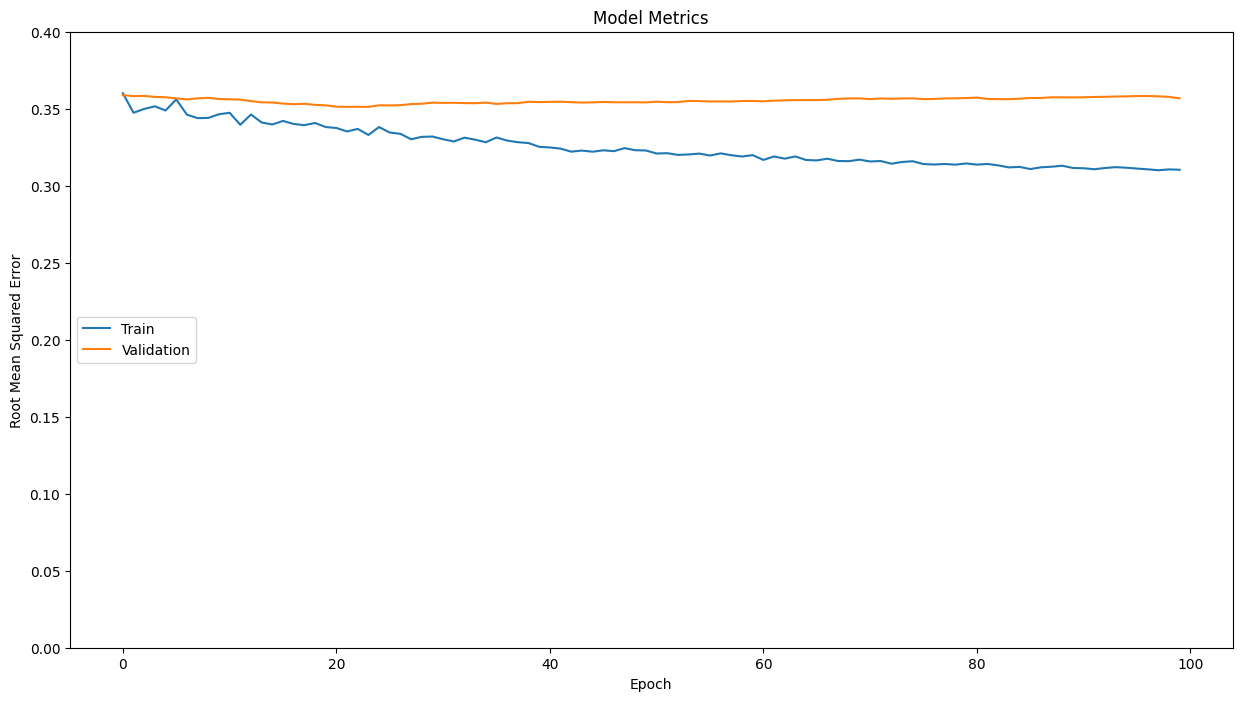

In [51]:
# Menampilkan plot loss dan validation
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['Train', 'Validation'], loc='center left')
plt.show()

## **Prediksi Top 10 Rekomendasi Pariwisata di Bandung**

Membuat dataframe baru `place_df` dengan kolom penting dari `df_place` dan mengganti nama kolom agar lebih singkat dan konsisten, serta menyalin data rating ke dataframe `df`.

In [52]:
# Menyiapkan dataframe
place_df = df_place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = df_rating.copy()

Memilih satu `user_id` secara acak dari data rating, lalu mengambil semua tempat wisata yang pernah dikunjungi oleh user tersebut.

In [53]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

Membuat daftar ID tempat wisata yang belum dikunjungi oleh user terpilih, mengubahnya ke dalam format encoded, dan menggabungkan dengan ID user untuk digunakan sebagai input pada model rekomendasi.

In [54]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

Melakukan prediksi rating untuk tempat-tempat yang belum dikunjungi user, memilih 10 dengan rating tertinggi, lalu menampilkan rekomendasi tersebut bersama 5 tempat favorit user.

In [55]:
# Prediksi rating untuk semua tempat yang belum dikunjungi user
ratings = model.predict(user_place_array).flatten()

# Ambil indeks 10 tempat dengan rating prediksi tertinggi
top_ratings_indices = ratings.argsort()[-10:][::-1]

# Ambil ID tempat dari hasil prediksi terbaik
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[idx][0])
    for idx in top_ratings_indices
]

# Header rekomendasi
print(f"Daftar rekomendasi untuk: User {user_id}")
print("=" * 45, '\n')

# Menampilkan 5 tempat dengan rating tertinggi yang pernah dikunjungi user
print("Tempat dengan rating wisata paling tinggi dari user")
print("-" * 60)

top_place_user_ids = (
    place_visited_by_user
    .sort_values(by='Place_Ratings', ascending=False)
    .head(5)
    .Place_Id
    .values
)

top_place_user_df = place_df[place_df['id'].isin(top_place_user_ids)]

for row in top_place_user_df.itertuples():
    print(f"{row.place_name} : {row.category}")

print("\n" + "-" * 60)
print("Top 10 Rekomendasi Tempat Wisata untuk Anda")
print("-" * 60)

# Menampilkan daftar 10 tempat rekomendasi
recommended_places_df = place_df[place_df['id'].isin(recommended_place_ids)]

for i, row in enumerate(recommended_places_df.itertuples(), start=1):
    print(f"{i}. {row.place_name}")
    print(f"    Kategori       : {row.category}")
    print(f"    Harga Tiket    : {row.price}")
    print(f"    Rating Wisata  : {row.rating}\n")

print("=" * 45)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Daftar rekomendasi untuk: User 111

Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Teras Cikapundung BBWS : Taman Hiburan
Wisata Batu Kuda : Cagar Alam
Museum Gedung Sate : Budaya
Masjid Agung Trans Studio Bandung : Tempat Ibadah
Sanghyang Heuleut : Cagar Alam

------------------------------------------------------------
Top 10 Rekomendasi Tempat Wisata untuk Anda
------------------------------------------------------------
1. Museum Pos Indonesia
    Kategori       : Budaya
    Harga Tiket    : 0
    Rating Wisata  : 4.5

2. Situ Patenggang
    Kategori       : Cagar Alam
    Harga Tiket    : 20000
    Rating Wisata  : 4.5

3. Kawah Rengganis Cibuni
    Kategori       : Cagar Alam
    Harga Tiket    : 5000
    Rating Wisata  : 4.3

4. Pemandian Air Panas Cimanggu
    Kategori       : Cagar Alam
    Harga Tiket    : 23000
    Rating Wisata  : 3.9

5. Glamping Lakeside Rancabali
    K

**Insight Akhir:**

* Jumlah tempat wisata di Bandung sangat beragam, sehingga rekomendasi bisa dibuat baik menggunakan pendekatan *content-based* (berdasarkan kategori/tempat mirip) maupun *collaborative filtering* (berdasarkan rating user).

* Sistem rekomendasi ini memiliki potensi besar untuk dikembangkan menjadi aplikasi mobile/web,
  di mana rekomendasi bisa dipersonalisasi lebih dalam dengan memasukkan data seperti lokasi real-time, preferensi, dan aktivitas pengguna.